# Caminos Más Cortos

En este caso, queremos representar las intersecciones de los caminos de una ciudad mediante vértices de un multi-grafo dirigido ponderado. La ponderación o peso de la arista corresponde al largo del segmento, por lo tanto podemos utilizar el algoritmo Dijsktra para calcular el costo de un camino entre dos puntos. 

<Figure size 432x288 with 0 Axes>

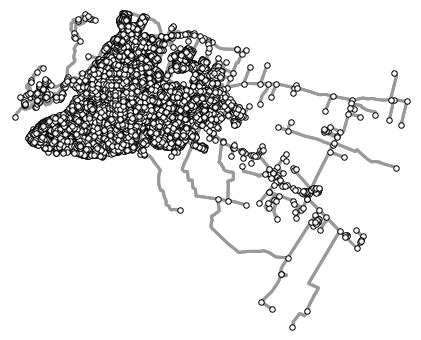

,0
circuity_avg,1.04751
clean_intersection_count,None
clean_intersection_density_km,None
edge_density_km,None
edge_length_avg,82.9286
edge_length_total,1.67541e+06
intersection_count,6547
intersection_density_km,None
k_avg,5.31169
m,20203


In [9]:
import osmnx as ox
import networkx as nx
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

ox.config(log_file=True, log_console=True, use_cache=True)
G=ox.graph_from_place('Talca,Chile',network_type='bike', simplify=True)

plt.figure()
ox.plot_graph(ox.project_graph(G),node_color='w', node_edgecolor='k', node_size=30,node_zorder=3, edge_linewidth=3)
plt.show()

stats=ox.basic_stats(G)
df=pd.DataFrame(pd.Series(stats)).T
display(df.T) 


In [30]:
origin_point = (-35.434415,-71.620053)
destination_point = (-35.425901, -71.666645)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
ox.save_graphml(G, filename='talca_ciclovias.graphml')

Nodos : 7607
Origen : {'y': -35.4345336, 'x': -71.6200011, 'osmid': 3088233301}
Destino : {'y': -35.4259173, 'x': -71.666648, 'osmid': 378630991, 'highway': u'traffic_signals'}
vecino :  ({'y': -35.4352296, 'x': -71.6186399, 'osmid': 3733299066}, 167.325)
vecino :  ({'y': -35.4352296, 'x': -71.6186399, 'osmid': 3733299066}, 247.96099999999998)
vecino :  ({'y': -35.4343475, 'x': -71.6205819, 'osmid': 3088234175}, 56.616)


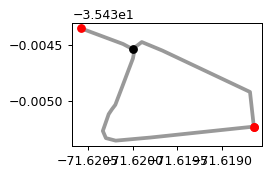

In [67]:
import json
from shapely.geometry import LineString

def plot_coords(ax, x, y, color='#FF0000', zorder=1):
    ax.plot(x, y, 'o', color=color, zorder=zorder)

def plot_line(ax, ob, color='#999999'):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, color=color, linewidth=3, solid_capstyle='round', zorder=1)
        
        
print 'Nodos :',N
print 'Origen :',G.node[origin_node]
print 'Destino :',G.node[destination_node]

fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(221)
for p,n,data in G.edges(origin_node,True):
    line=data['geometry']
    plot_line(ax, line)
    print 'vecino : ',(G.node[n],data['length'])
    plot_coords(ax, G.node[n]['x'], G.node[n]['y'])
plot_coords(ax, G.node[origin_node]['x'], G.node[origin_node]['y'],color='#000000')

    